# Examples of Learning 学習の例

## Distribution of one variable

### Parameteric

Based on samples shown in the histogram below, we may consider the distribution of population from which the samples were drawn as a normal distribution.

Once we set a particular mean and sd for the normal distribution, the population distribution is specified and we can predict the value of next sample from it.

下に示すようなヒストグラムをなすサンプルが得られたとき、そのサンプルの母集団を正規分布とみなすかもしれない。

その正規分布の平均と標準偏差として特定の値を取ることにすれば、母集団分布は定まり、この母集団からの次のサンプルの値についての予測が可能になる。

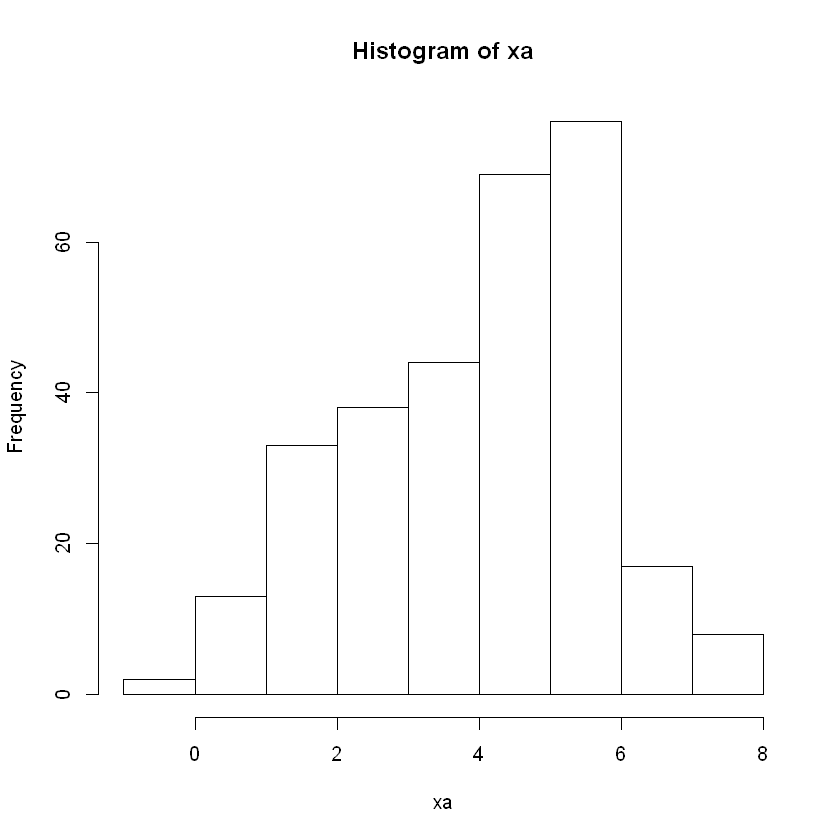

In [86]:
na1 <- 100
na2 <- 200
xa <- c(rnorm(na1,2,1),rnorm(na2,5,1))
hist(xa)

[1] 3.976353

[1] 1.714092

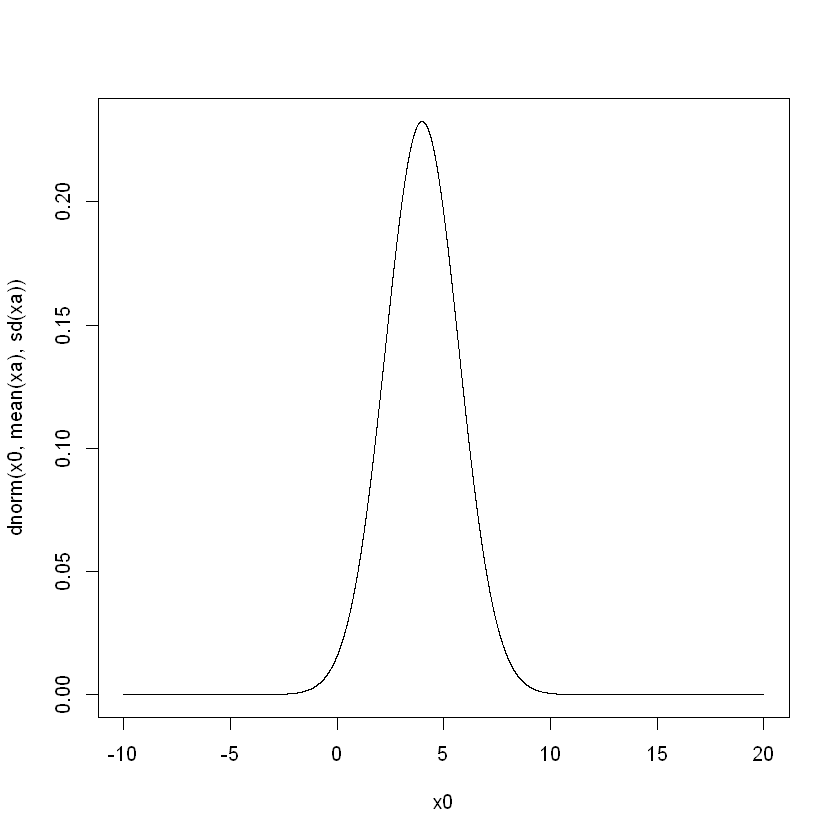

In [87]:
mean(xa)
sd(xa)
x0 <- seq(from=-10,to=20,length=10000)
plot(x0,dnorm(x0,mean(xa),sd(xa)),type="l")

### Non-parametric

Without assumption of distribution with known name, we may tell probability density of the population.

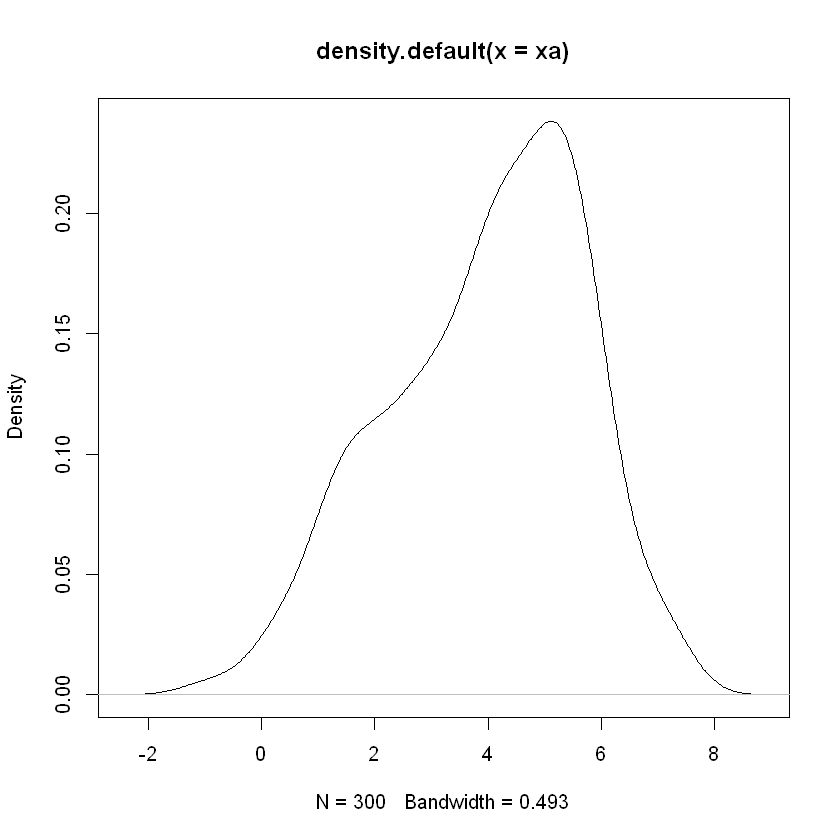

In [88]:
y <- density(xa)
plot(y)

## Joint distribution of two variables
### Non-parametric

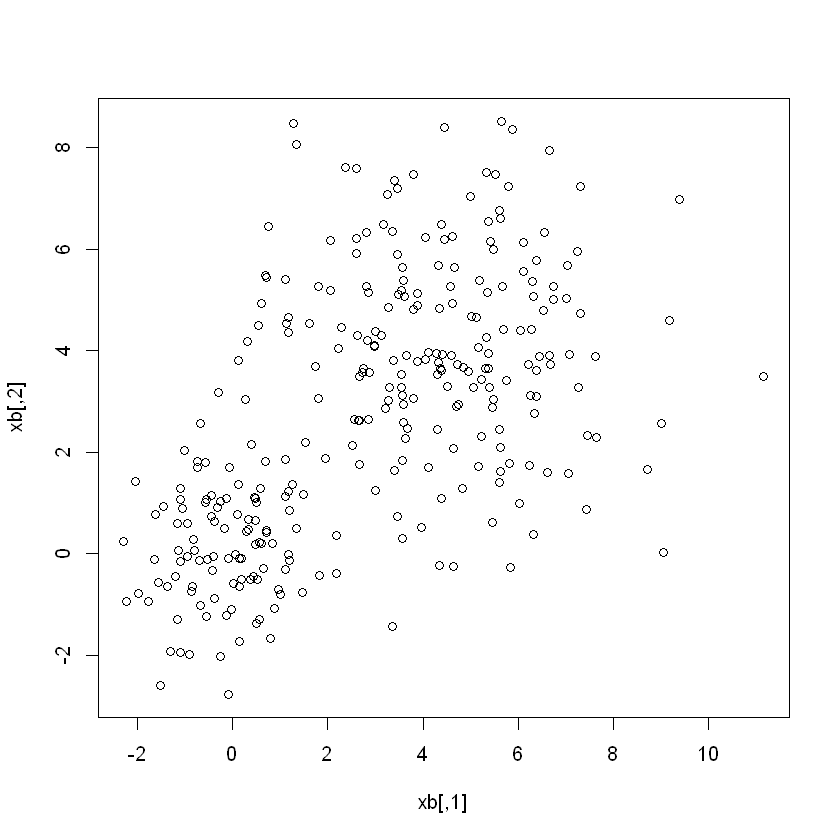

In [89]:
nb1 <- 100
nb2 <- 200
x1 <- matrix(rnorm(nb1*2,0,1),ncol=2)
x2 <- matrix(rnorm(nb2*2,4,2),ncol=2)
xb <- rbind(x1,x2)
plot(xb)

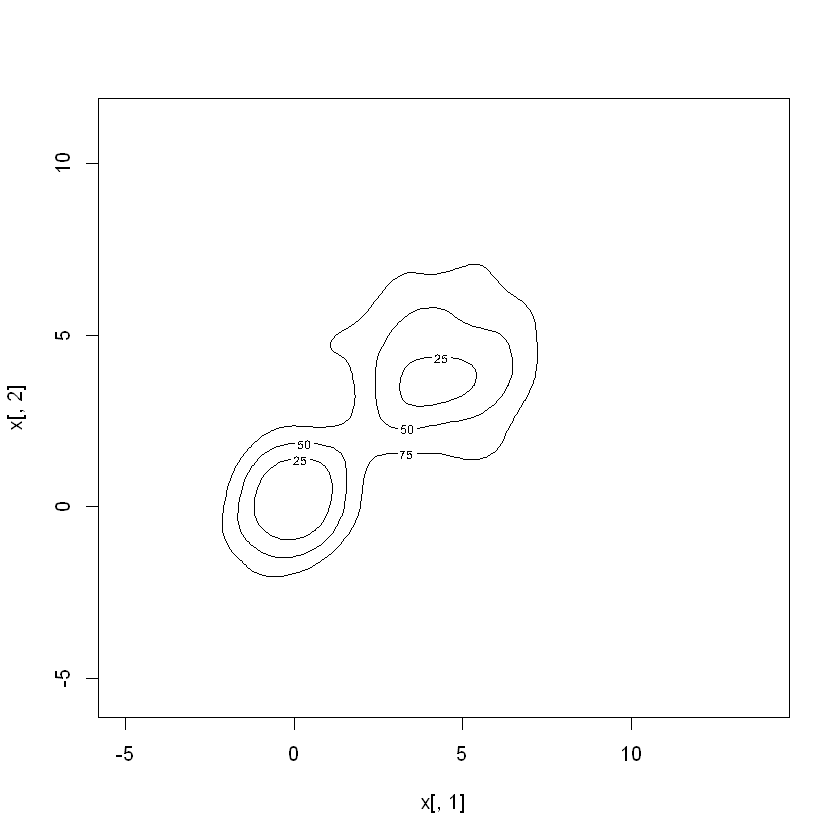

In [90]:
library(ks)
out <- kde(xb)
plot(out)

## Relation of two variables

This is the first example.

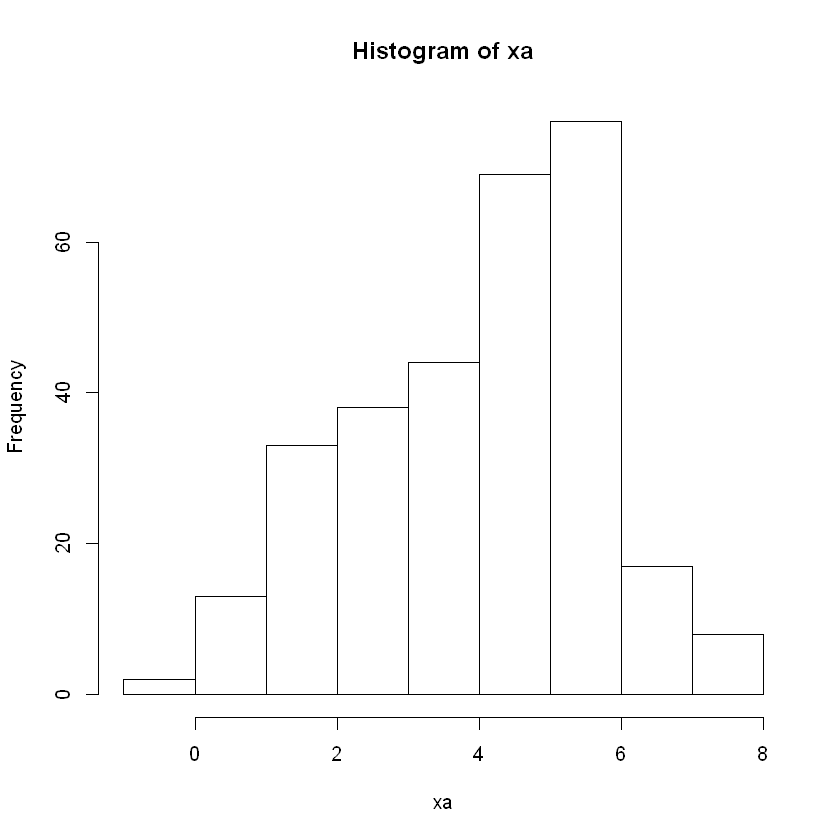

In [91]:
hist(xa)

One of two variables is qunatitative and the other is categorical.

## Supervised Learning 教師あり学習
The category information is given.

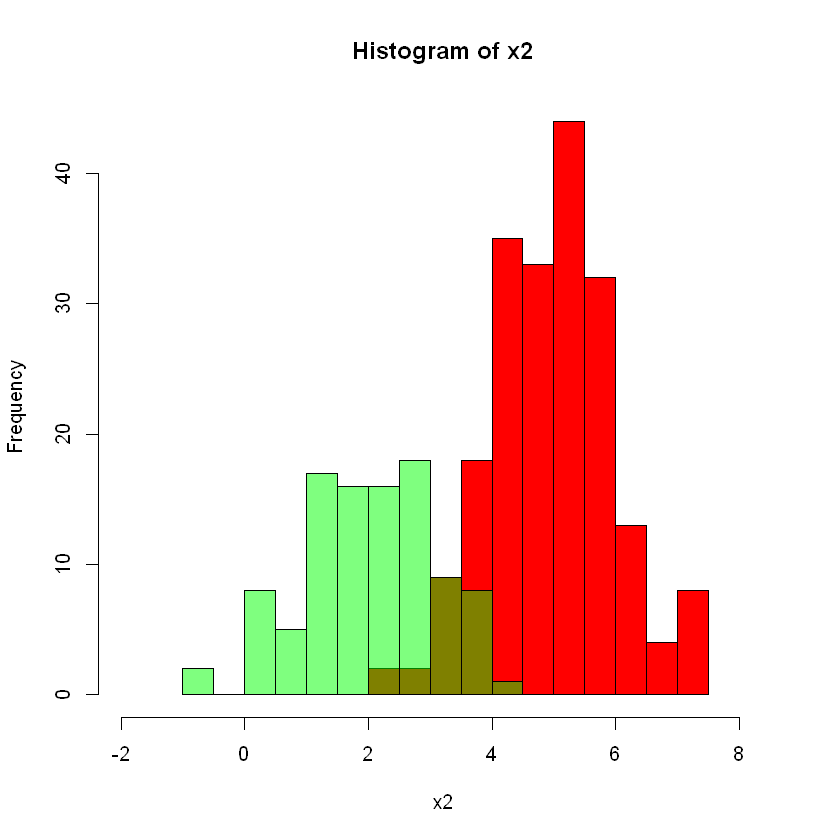

In [92]:
x1 <- xa[1:na1]
x2 <- xa[(na1+1):(na1+na2)]
hist(x2, xlim=range(xa)+c(-1,1), col="red")
hist(x1, add=T, col=rgb(0, 1, 0, 0.5) )

[1] 300

[1] 300

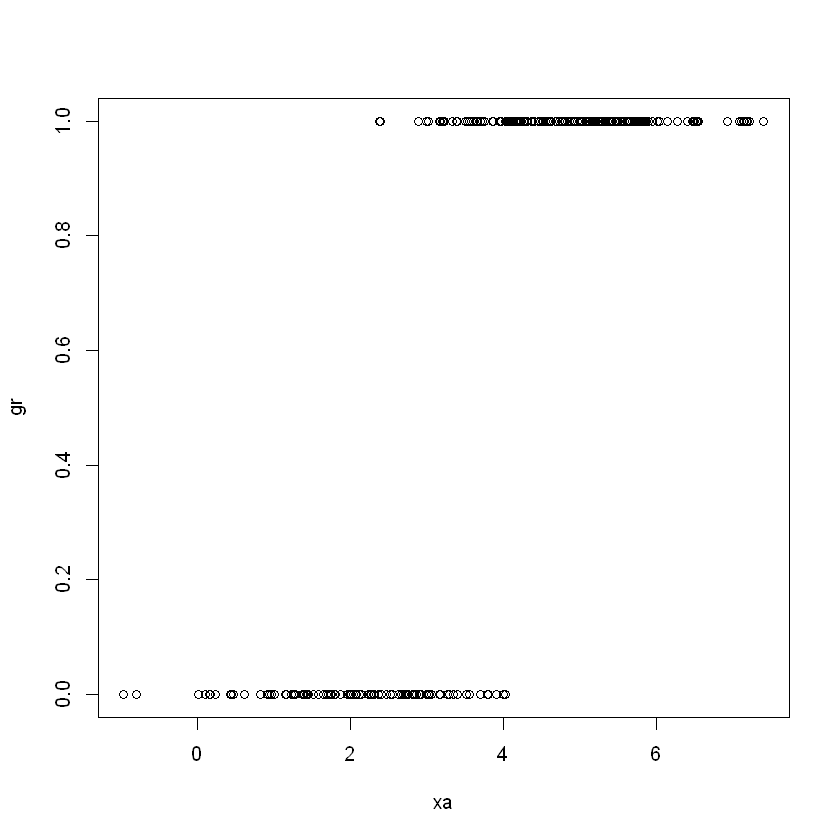

In [93]:
gr <- c(rep(0,na1),rep(1,na2))
plot(xa,gr)
length(gr)
length(xa)

The relation between a quantitative value and a dichotomous variable can be evaluated with logistic regression, that is a model fitting to "learn" probability to be 0/1 conditioned values of the quantitative variable.

The curve as a result of logistic regression is "learned".

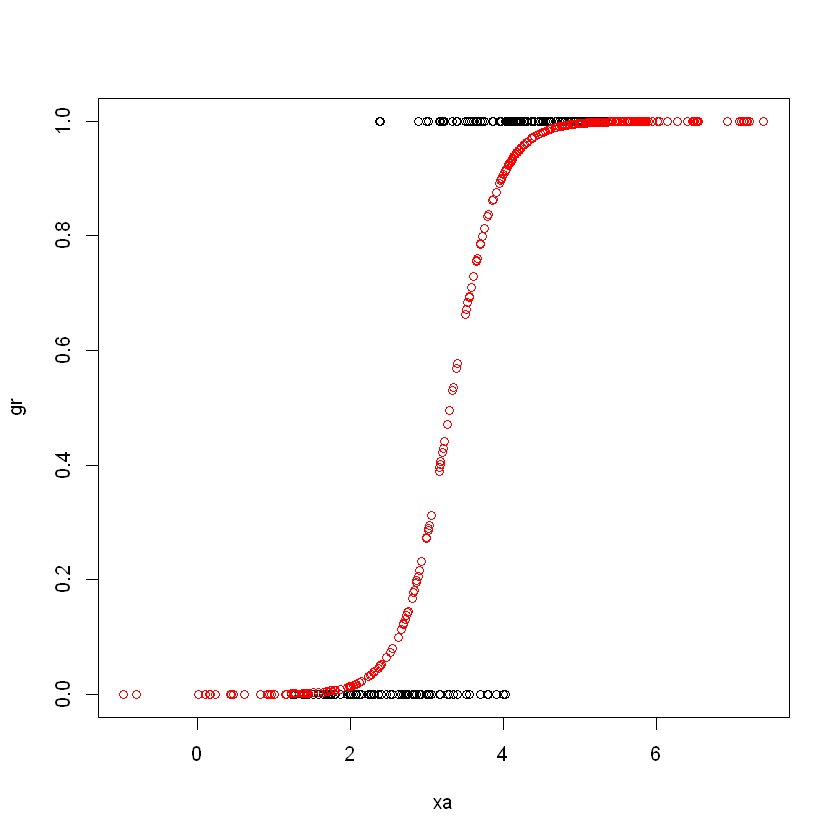

In [94]:
library(prediction)
glmout <- glm(gr ~ xa,family="binomial")
ya0 <- prediction(glmout)$fitted
plot(xa,gr)
points(xa,ya0,col=2)

When the group labels are considered as the "answers", the classification task is one of "supervised learnings".

For example we can re-group samples based on the prediction values ( red dots).



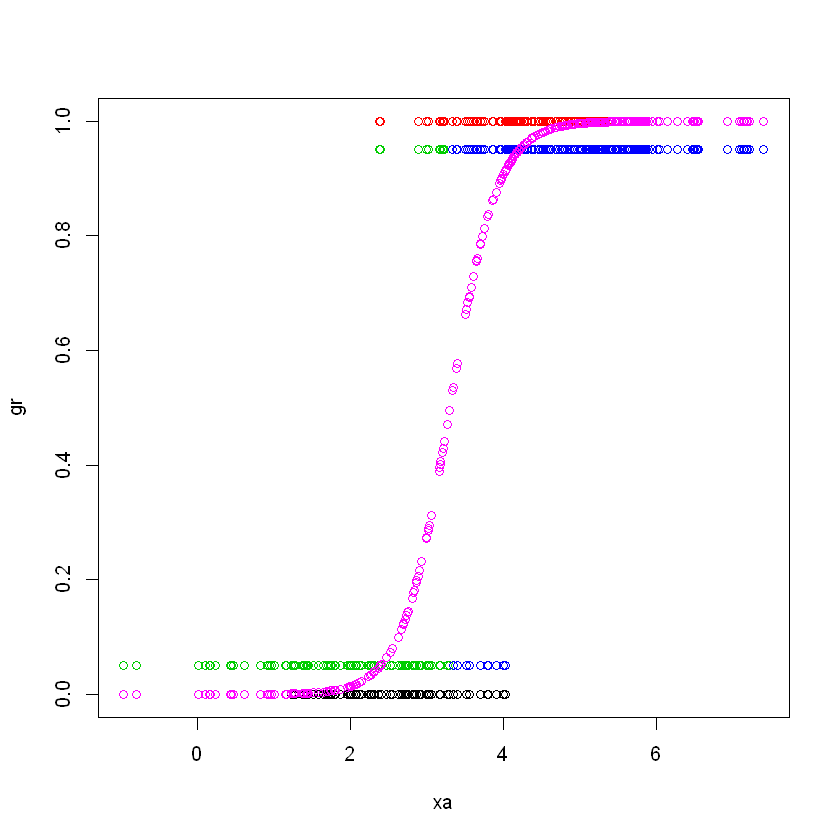

In [95]:
re.gr <- ya0 > 0.5

plot(xa,gr,col=gr+1)
points(xa,0.9*(gr-0.5)+0.5,col=re.gr+3)
points(xa,ya0,col=6)

## Un-supervised Learning 教師なし学習

When no group information is available, we may group them into two groups.

Because of no answers, this task is un-supervised.


The re-grouping results of supervised and un-supervised learnings are slightly different.

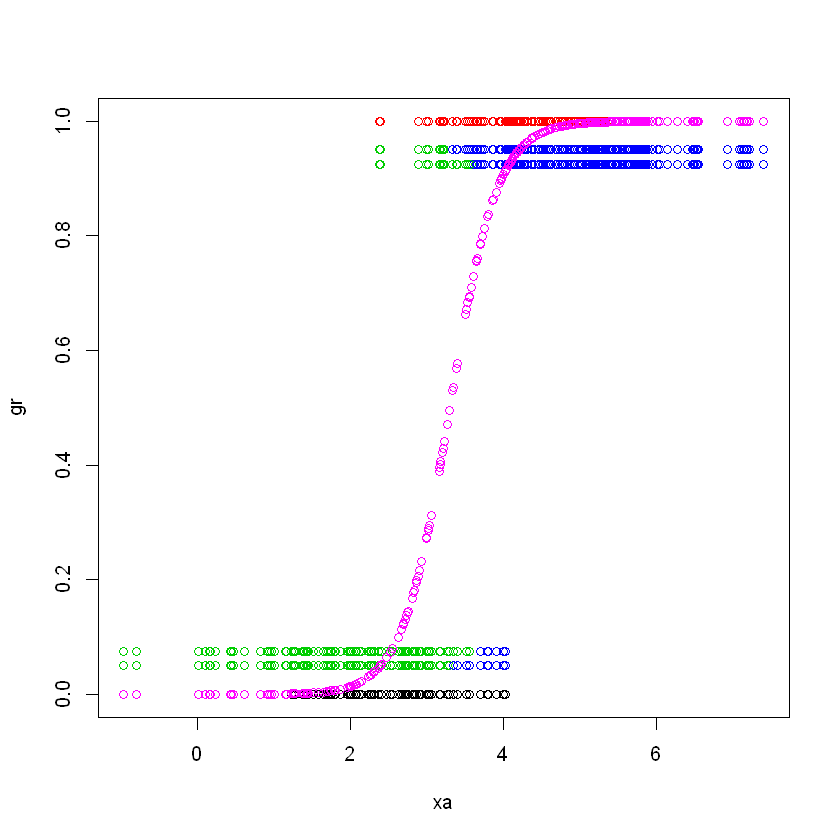

In [96]:
kmeans.out <- kmeans(xa,2)
plot(xa,gr,col=gr+1)
points(xa,0.9*(gr-0.5)+0.5,col=re.gr+3)
points(xa,0.85*(gr-0.5)+0.5,col=kmeans.out[[1]]+2)
points(xa,ya0,col=6)

## Supervised and Un-supervised Learnings and Joint Distributions

### Supervised Learning

The data set for the logistic regression above (supervised learning) has two variables; one is quantitative and the other is categorical.

The samples were plotted in two dimensional space, in which two horizontal lines of y=0 and 1 are the space of occurence or the space of the joint distribution of two variables.

Supervised learning to re-group set a value along the quantitative axis, with which the space of joint distribution was restricted.

### Un-supervised Learning

The data set for the unsupervised classification has only one quantitative variable.

We believed there should be two groups that were hidden.

In other words, we assumed a joint distribution with a quantitative variable and a categorical variable, that was hidden, but a distribution that was mapped from two-variable space to one-variable space was available and we attempted to recover the joint distribution.
